In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("IKP_percent_only.csv")

In [3]:
df

,Desa/Kelurahan,I.2.1.1,I.3.1.1,I.4.1.1,II.1.1.2,II.1.2.3,II.1.3.1,II.3.3.2
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,NaN,22.222222
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,NaN,70.000000
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,NaN,4.545455
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308


In [4]:
df = df.rename(columns={
    "I.1.1.1": "Rasio Gini Tanah",
    "I.2.1.1": "Luas Tanah yang Dikuasai",
    "I.3.1.1": "Ketersediaan Air untuk Budidaya",
    "I.4.1.1": "Asal Benih",
    "II.1.1.2": "Pengadaan Pestisida",
    "II.1.2.3": "Pengadaan Pupuk",
    "II.1.3.1": "Melakukan pemanfaatan limbah pertanian",
    "II.2.2.1": "Keragaman Jenis Tanaman",
    "II.3.3.1": "Nilai Tukar Petani",
    "II.3.3.2": "Rasio rerata penghasilan dengan UMK",
    "III.1.1.1": "Pola Pangan Harapan (PPH)",
    "III.1.1.2": "Indeks Shanon Weiner",
    "III.1.2.1": "Asal Bahan Baku",
    "III.1.4.1": "Daya dukung pangan"
})

In [5]:
df.isna().sum()

Desa/Kelurahan                             0
Luas Tanah yang Dikuasai                   0
Ketersediaan Air untuk Budidaya            0
Asal Benih                                 0
Pengadaan Pestisida                        0
Pengadaan Pupuk                            0
Melakukan pemanfaatan limbah pertanian    11
Rasio rerata penghasilan dengan UMK        0
dtype: int64

In [6]:
df["Melakukan pemanfaatan limbah pertanian"] = df["Melakukan pemanfaatan limbah pertanian"].fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Pengadaan Pestisida                     29 non-null     float64
 5   Pengadaan Pupuk                         29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 7   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [8]:
df

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308


### analisis distribusi

In [9]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Luas Tanah yang Dikuasai,29.0,63.272947,25.985539,7.692308,41.666667,69.230769,80.000000,100.000000
Ketersediaan Air untuk Budidaya,29.0,1.970847,5.521747,0.000000,0.000000,0.000000,0.000000,26.315789
Asal Benih,29.0,75.961068,23.676014,3.846154,63.888889,83.333333,91.071429,100.000000
Pengadaan Pestisida,29.0,31.030217,30.428659,0.000000,0.000000,28.000000,52.173913,91.304348
Pengadaan Pupuk,29.0,82.781849,28.959602,0.000000,84.210526,95.652174,100.000000,100.000000
Melakukan pemanfaatan limbah pertanian,29.0,24.078795,32.821831,0.000000,0.000000,0.000000,50.000000,100.000000
Rasio rerata penghasilan dengan UMK,29.0,32.706153,22.392992,0.000000,18.750000,26.923077,45.000000,100.000000


In [11]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

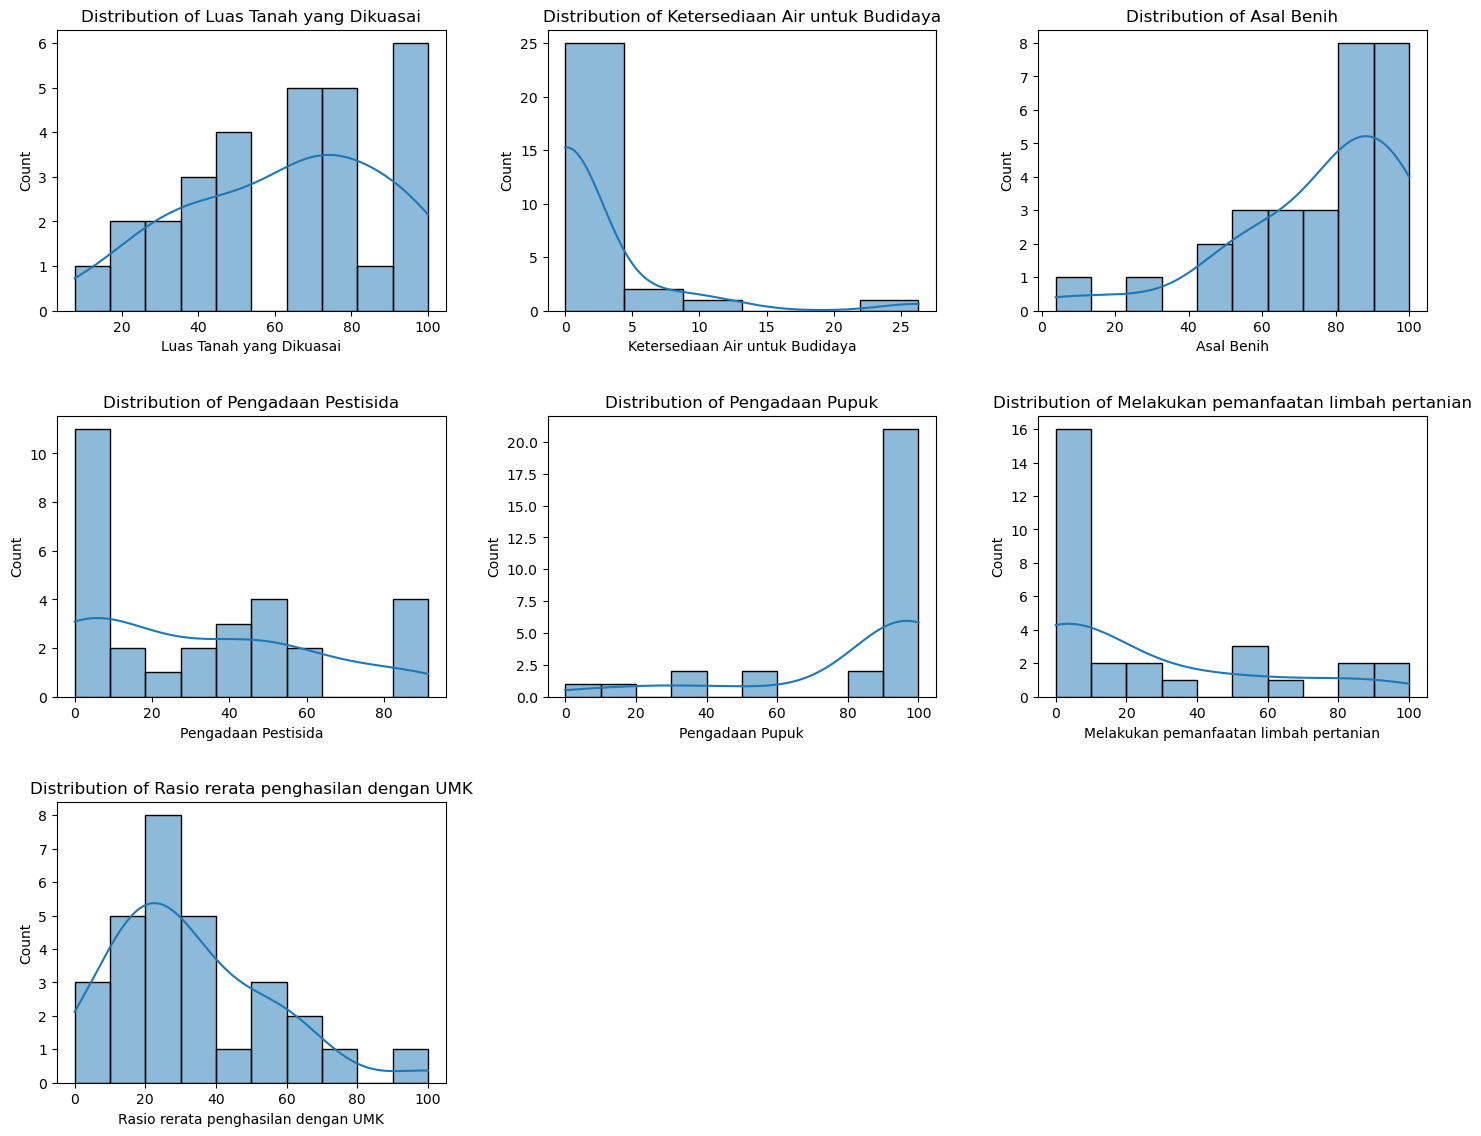

In [12]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

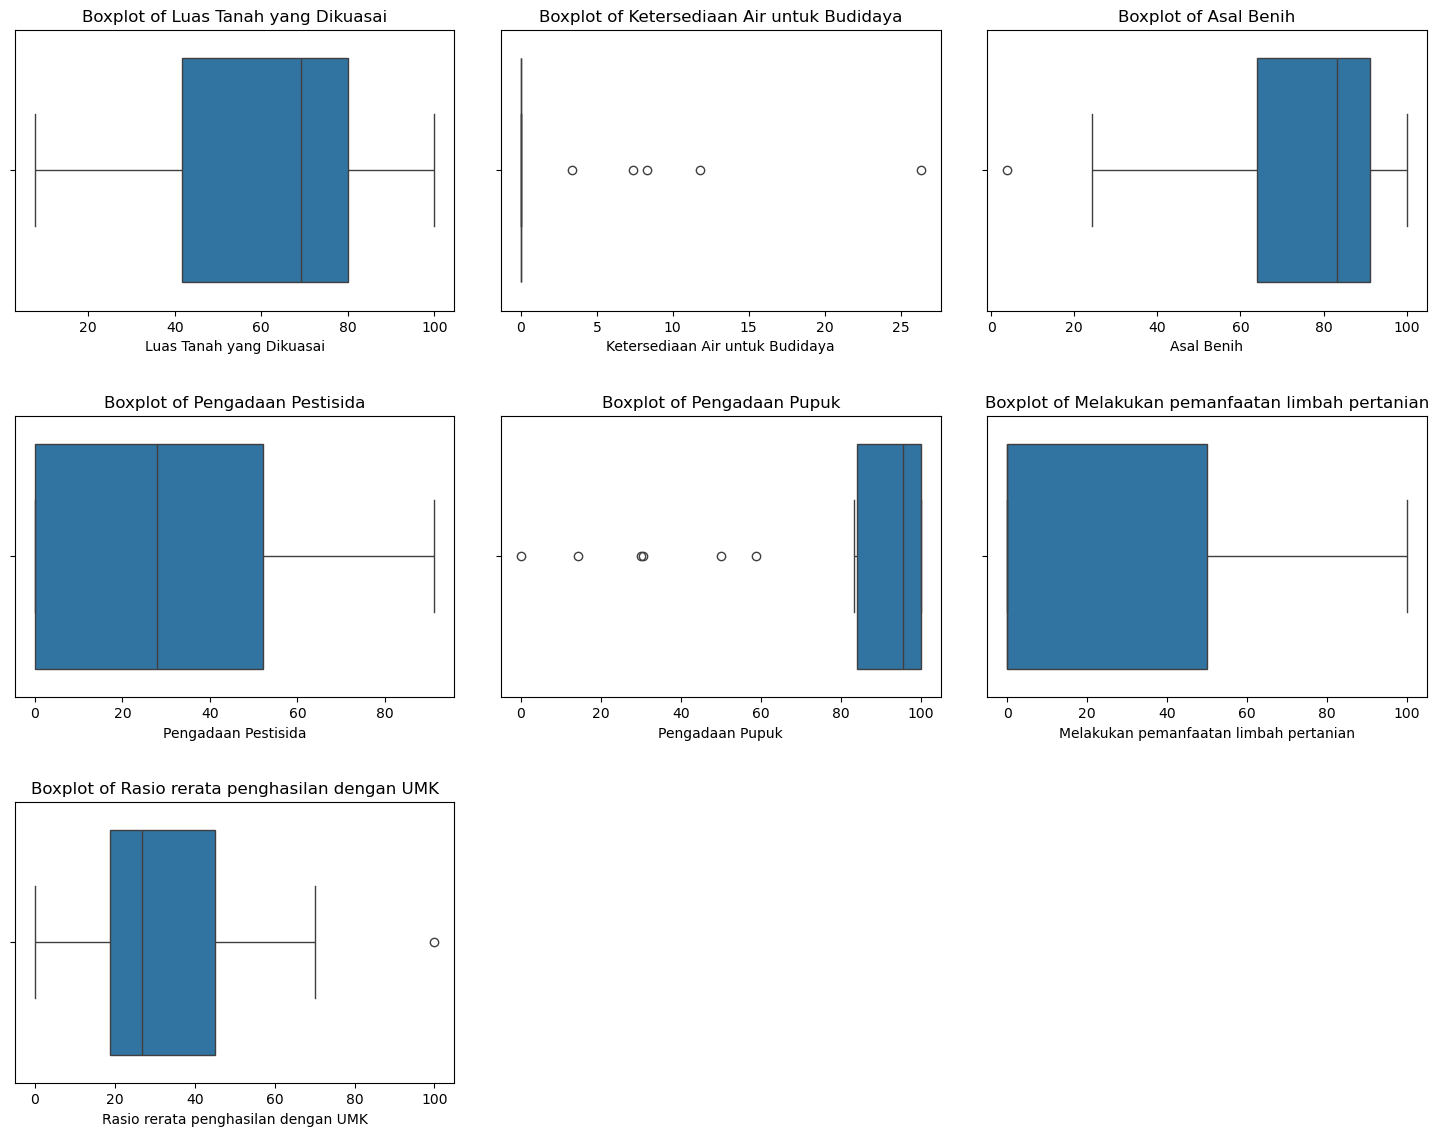

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [14]:
#Normalisasi
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

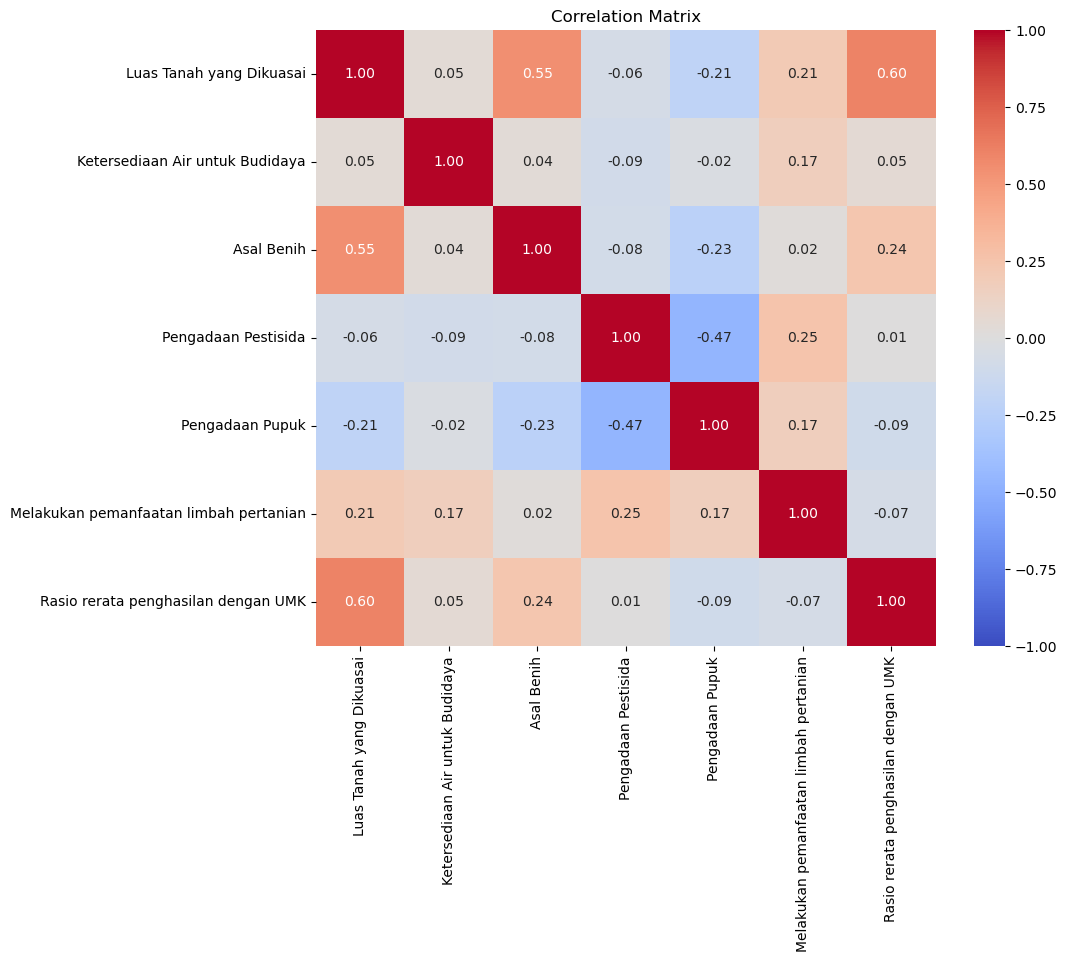

In [15]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

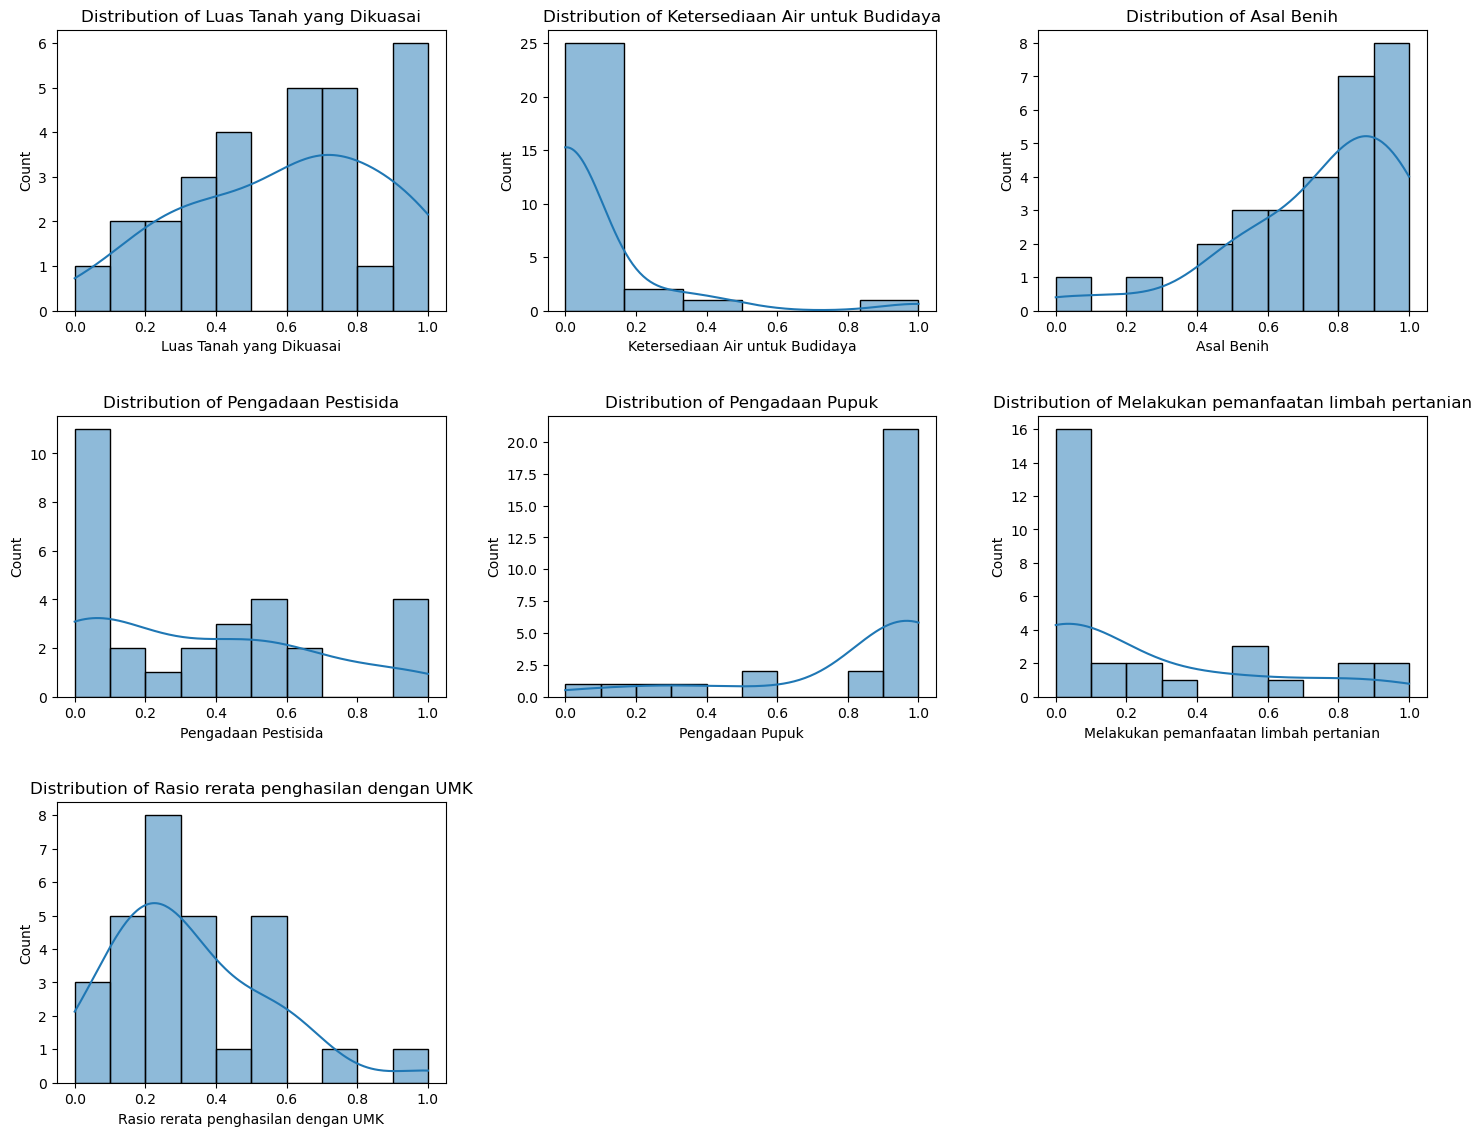

In [16]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], kde=True, bins=min(10, df_normalized[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [17]:
df_normalized

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,Balauring,0.909722,0.000000,1.000000,0.091270,0.500000,0.250000,0.333333
1,Benihading,0.891667,0.126667,0.757333,0.109524,1.000000,1.000000,0.133333
2,Bour,0.681373,0.447059,0.694118,0.901961,0.588235,0.833333,0.588235
3,Dikesare,0.157407,0.000000,0.624444,0.000000,1.000000,0.000000,0.222222
4,Duawutun,0.783333,0.000000,0.532000,0.000000,1.000000,0.000000,0.700000
5,Dulitukan,0.310606,0.000000,0.952727,0.000000,1.000000,0.000000,0.045455
6,Hoelea I,0.961310,0.000000,0.907143,0.664966,0.142857,0.000000,0.285714
7,Ile Kimok,0.925287,0.000000,1.000000,0.604269,0.931034,0.333333,0.379310
8,Kalikur,0.666667,0.000000,0.800000,0.926740,0.000000,0.090909,0.384615
9,Katakeja,0.000000,0.000000,0.000000,0.589744,1.000000,0.250000,0.076923


In [18]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Pengadaan Pestisida                     29 non-null     float64
 5   Pengadaan Pupuk                         29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 7   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


### pembangunan model clustering

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

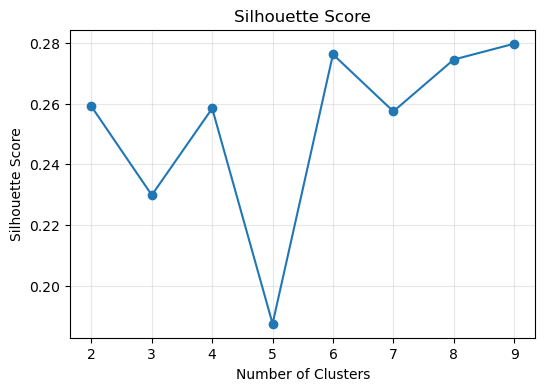

In [19]:
df_km = df_normalized.select_dtypes(include=['number']).copy()

silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_km)
    silhouette_scores.append(silhouette_score(df_km, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [20]:
# melatih model

model_kmeans = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_km)
silhouette_score(df_km, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.22988047112219534

### visualisasi hasil clustering

In [21]:
df_plot = df.copy()
df_plot = df_plot.loc[df_km.index]
df_plot["KM_Cluster"] = pd.Categorical(model_kmeans.labels_, categories=[0,1,2])

In [22]:
df_plot

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK,KM_Cluster
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333,0
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333,0
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529,2
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222,1
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000,0
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455,1
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429,2
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034,0
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538,2
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308,1


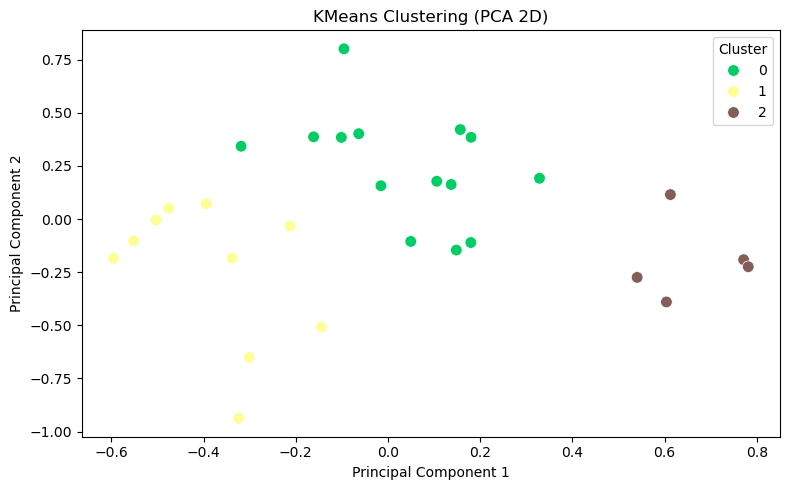

In [23]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_km)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_15316\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_15316\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_15316\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\h

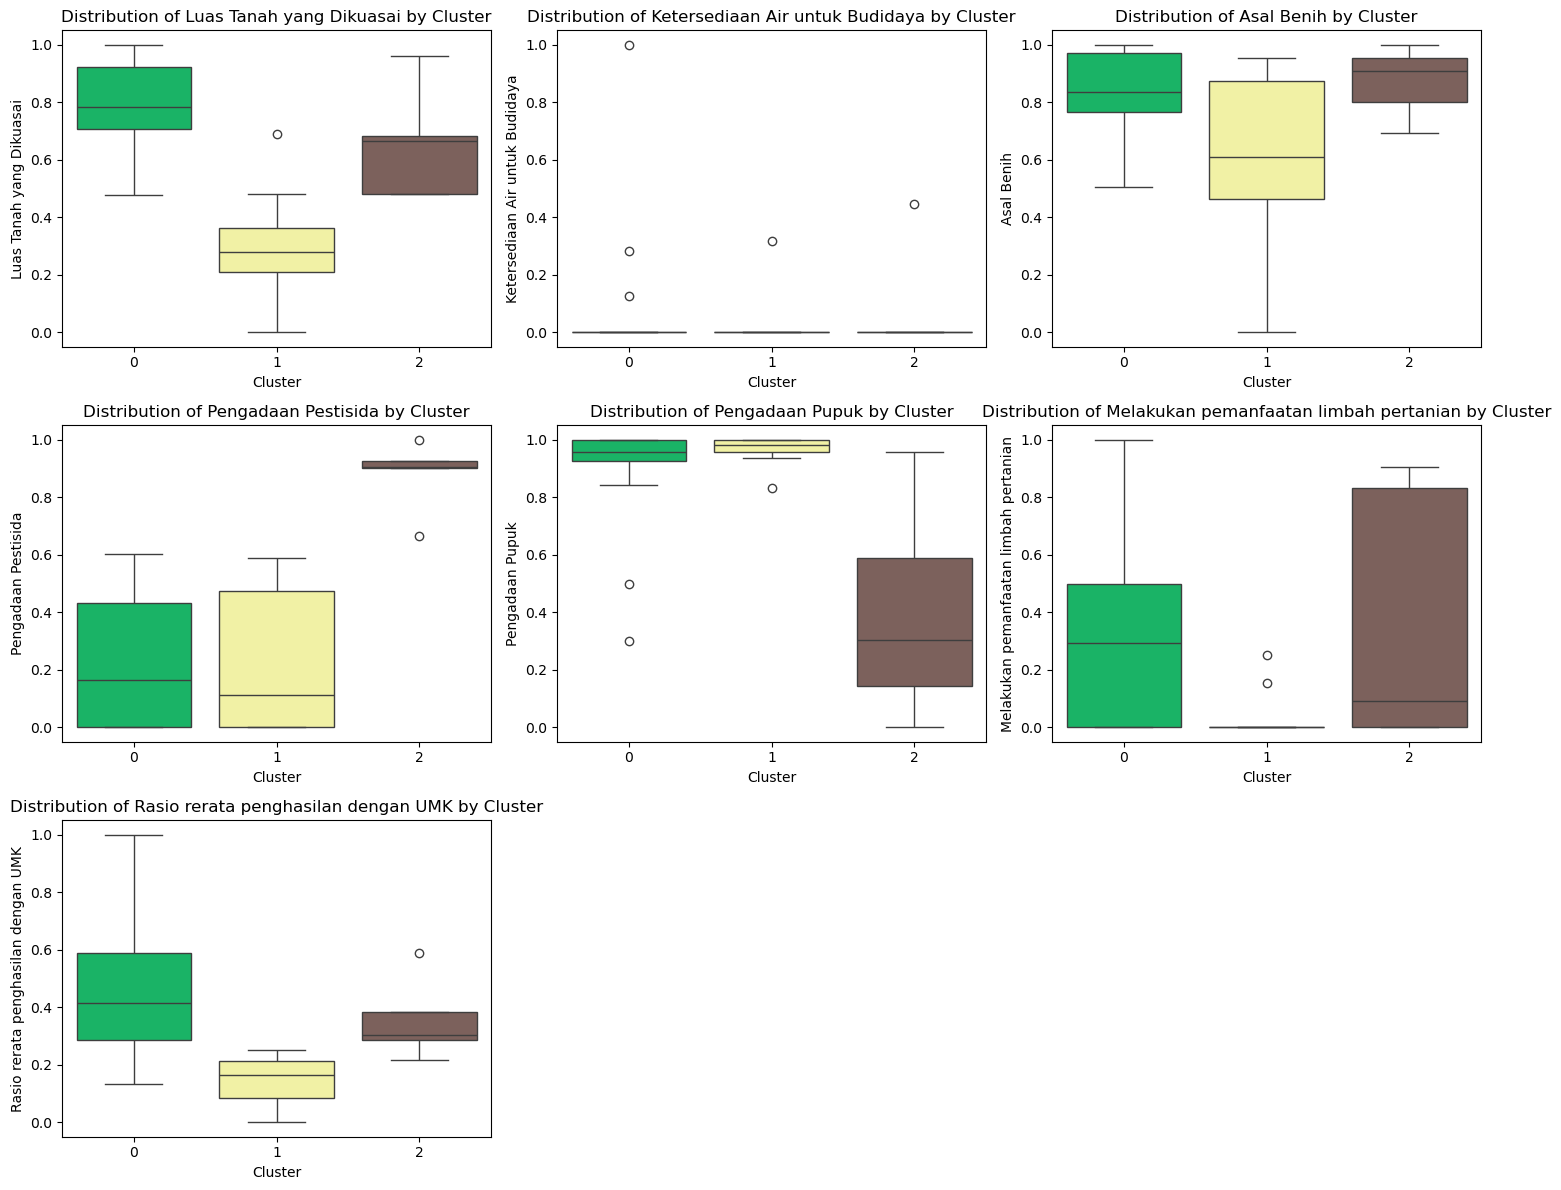

In [24]:
# Boxplot by Cluster

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
tmp_norm = df_normalized.copy()
tmp_norm["Cluster"] = df_plot["KM_Cluster"]  # sejajarkan label
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Cluster")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(); plt.show()

## coba hierarchical clustering

In [25]:
# Simpan nama desa terpisah
desa = df["Desa/Kelurahan"]

# Ambil hanya variabel numerik
X = df.drop("Desa/Kelurahan", axis=1)

# Tangani missing value (misalnya isi dengan median)
X = X.fillna(X.median())

# (opsional) Scaling → lebih adil antar indikator
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

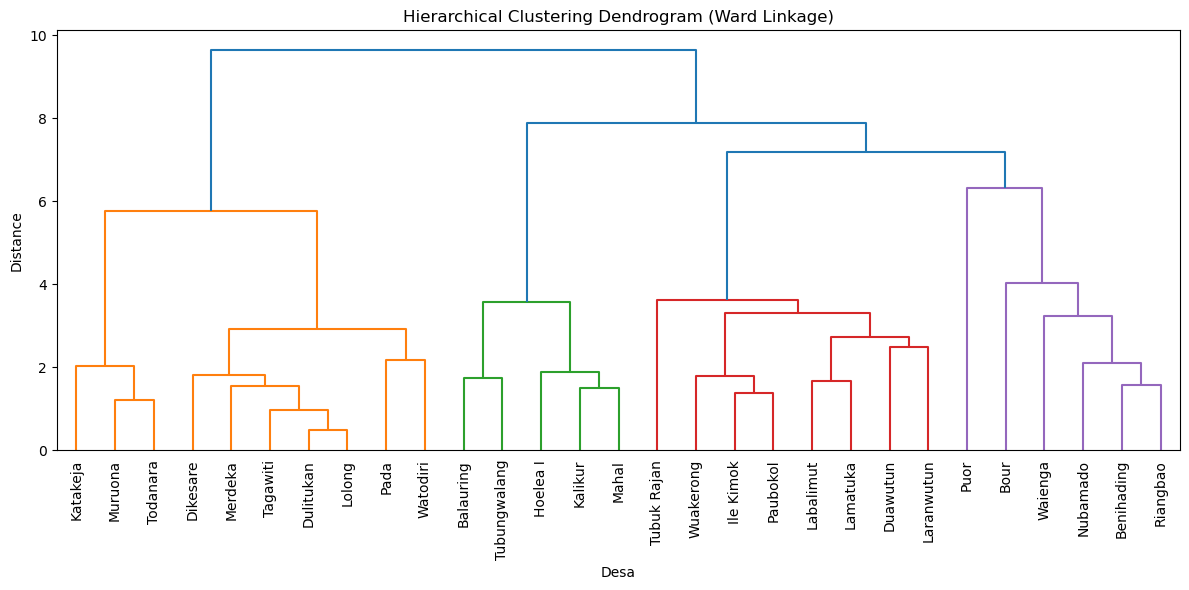

In [26]:
# linkage: 'ward' cocok untuk data numerik
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [27]:
hc_labels = fcluster(Z, 4, criterion="maxclust")
df_plot["HC_Cluster"] = pd.Categorical(hc_labels)

In [28]:
df_plot

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK,KM_Cluster,HC_Cluster
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333,0,2
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333,0,4
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529,2,4
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222,1,1
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000,0,3
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455,1,1
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429,2,2
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034,0,3
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538,2,2
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308,1,1


C:\Users\halid\AppData\Local\Temp\ipykernel_15316\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_15316\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_15316\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\User

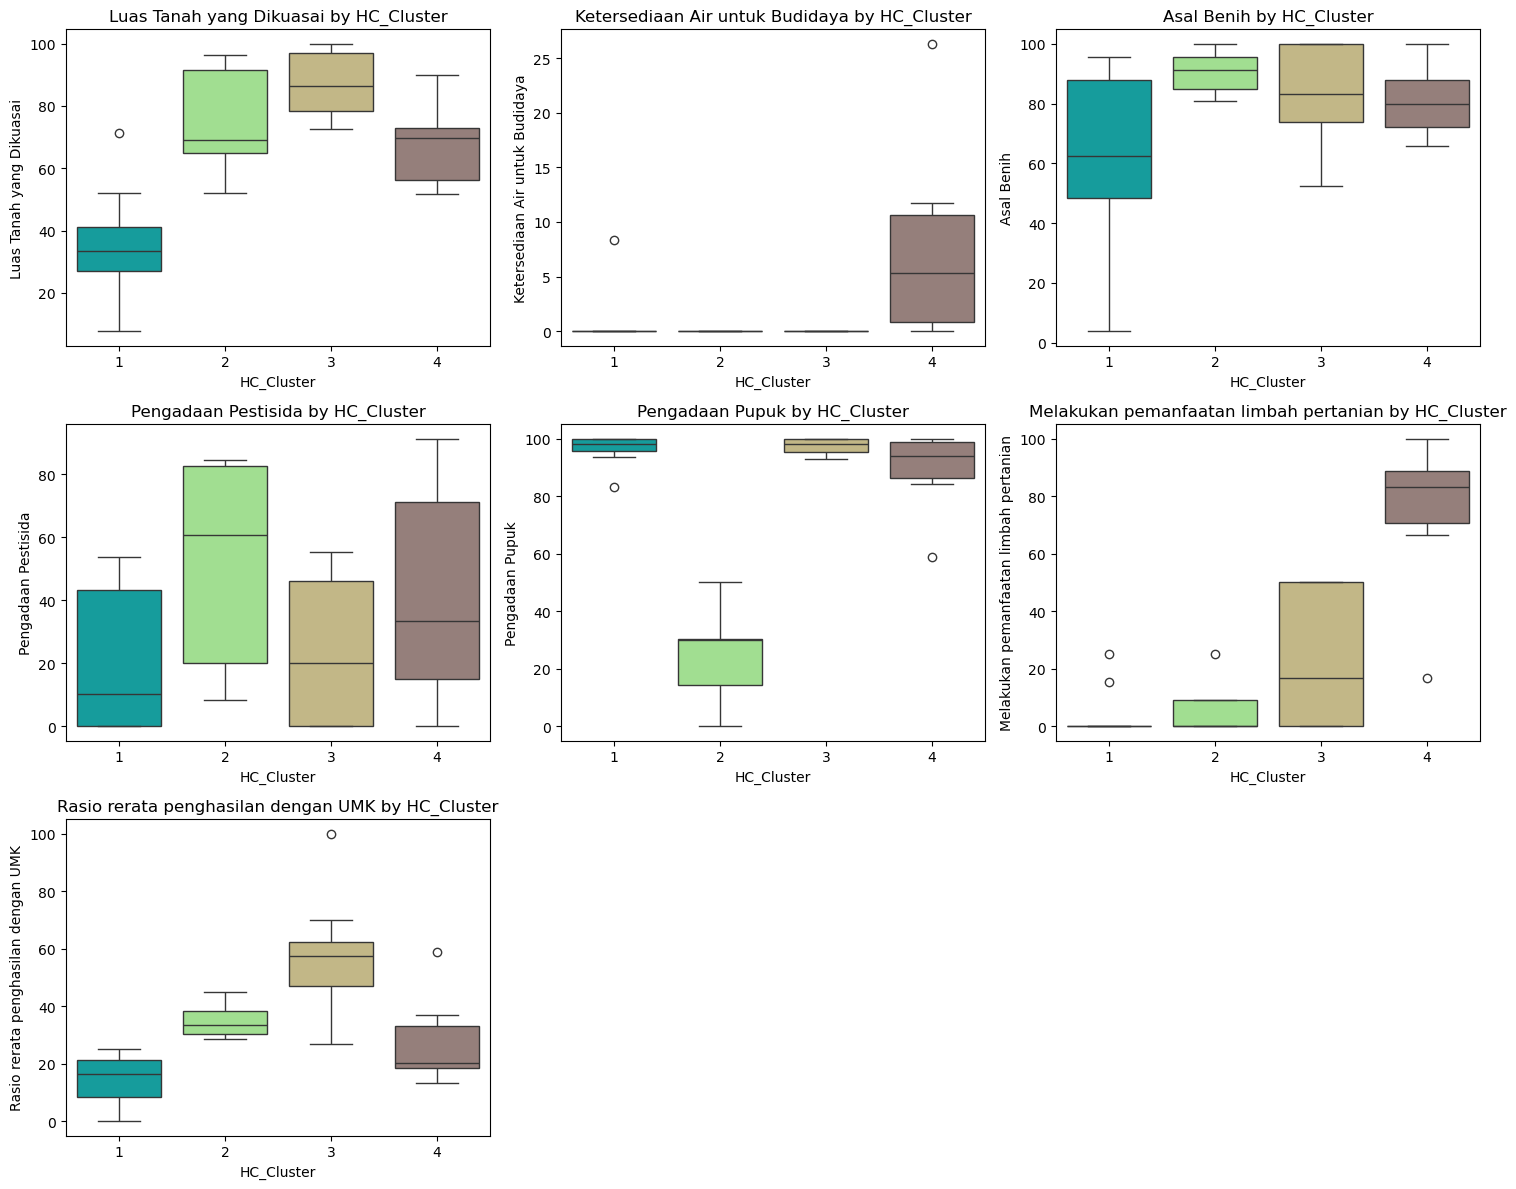

In [29]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col} by HC_Cluster")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

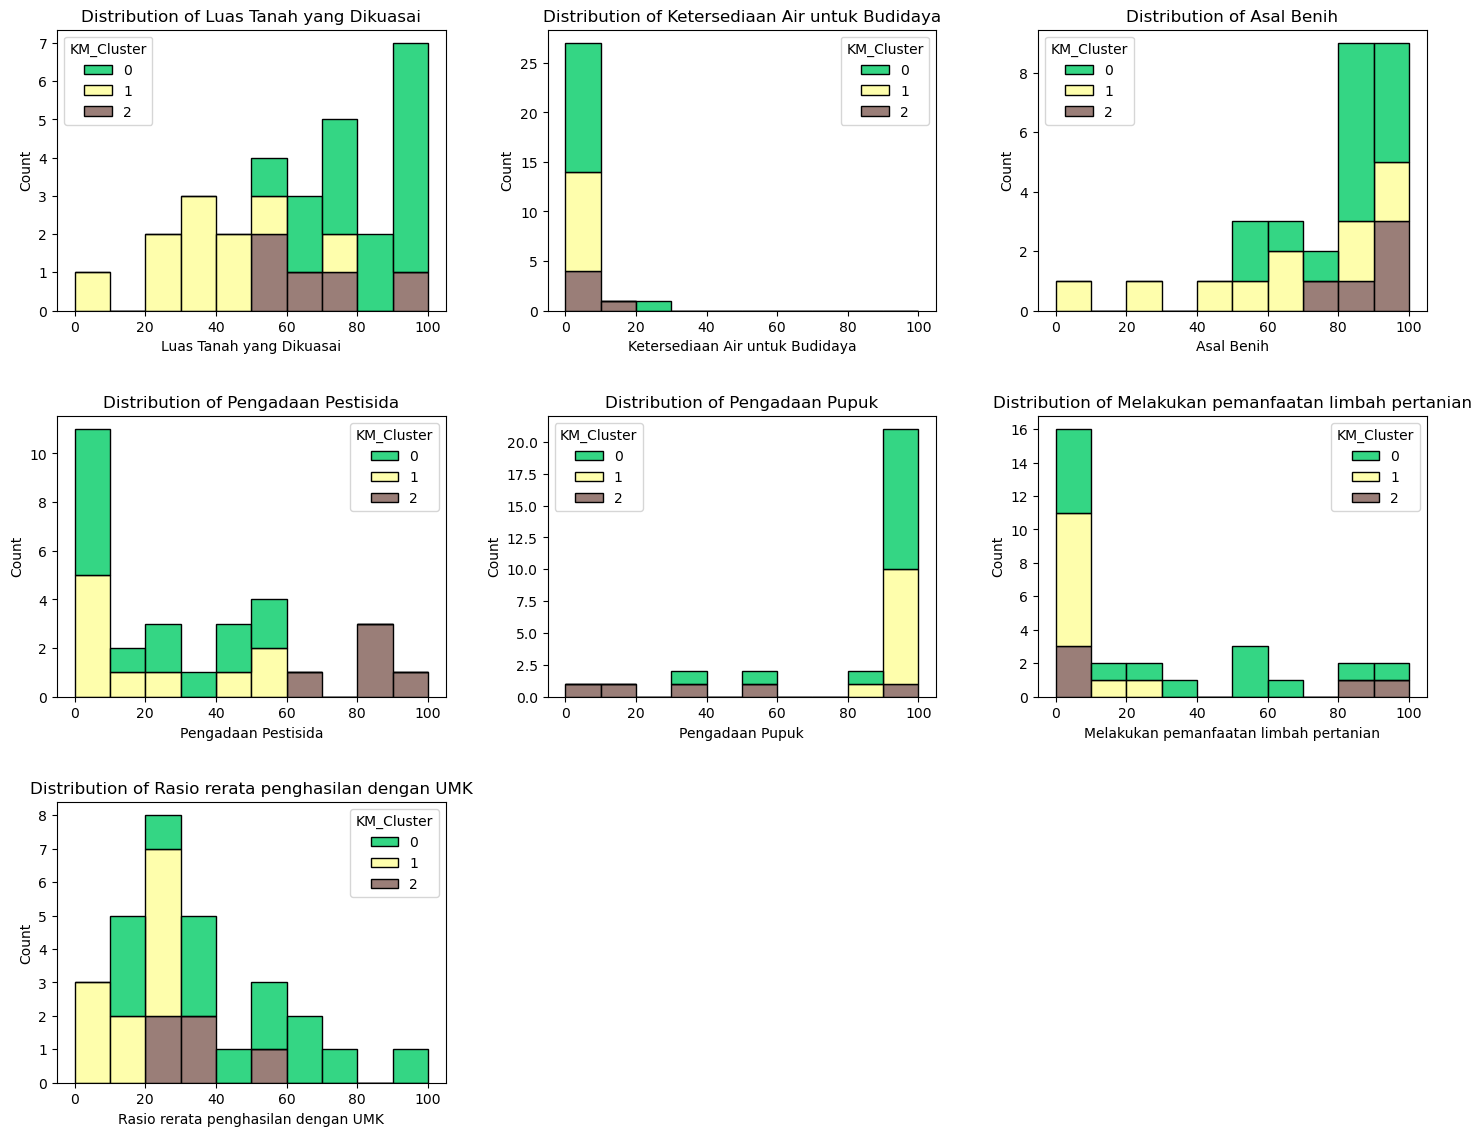

In [30]:
# 2) Palet warna terang biar konsisten
palette = {0: "#A6CEE3", 1: "#FDBF6F", 2: "#B2DF8A", 3: "#CAB2D6"}

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="terrain",
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

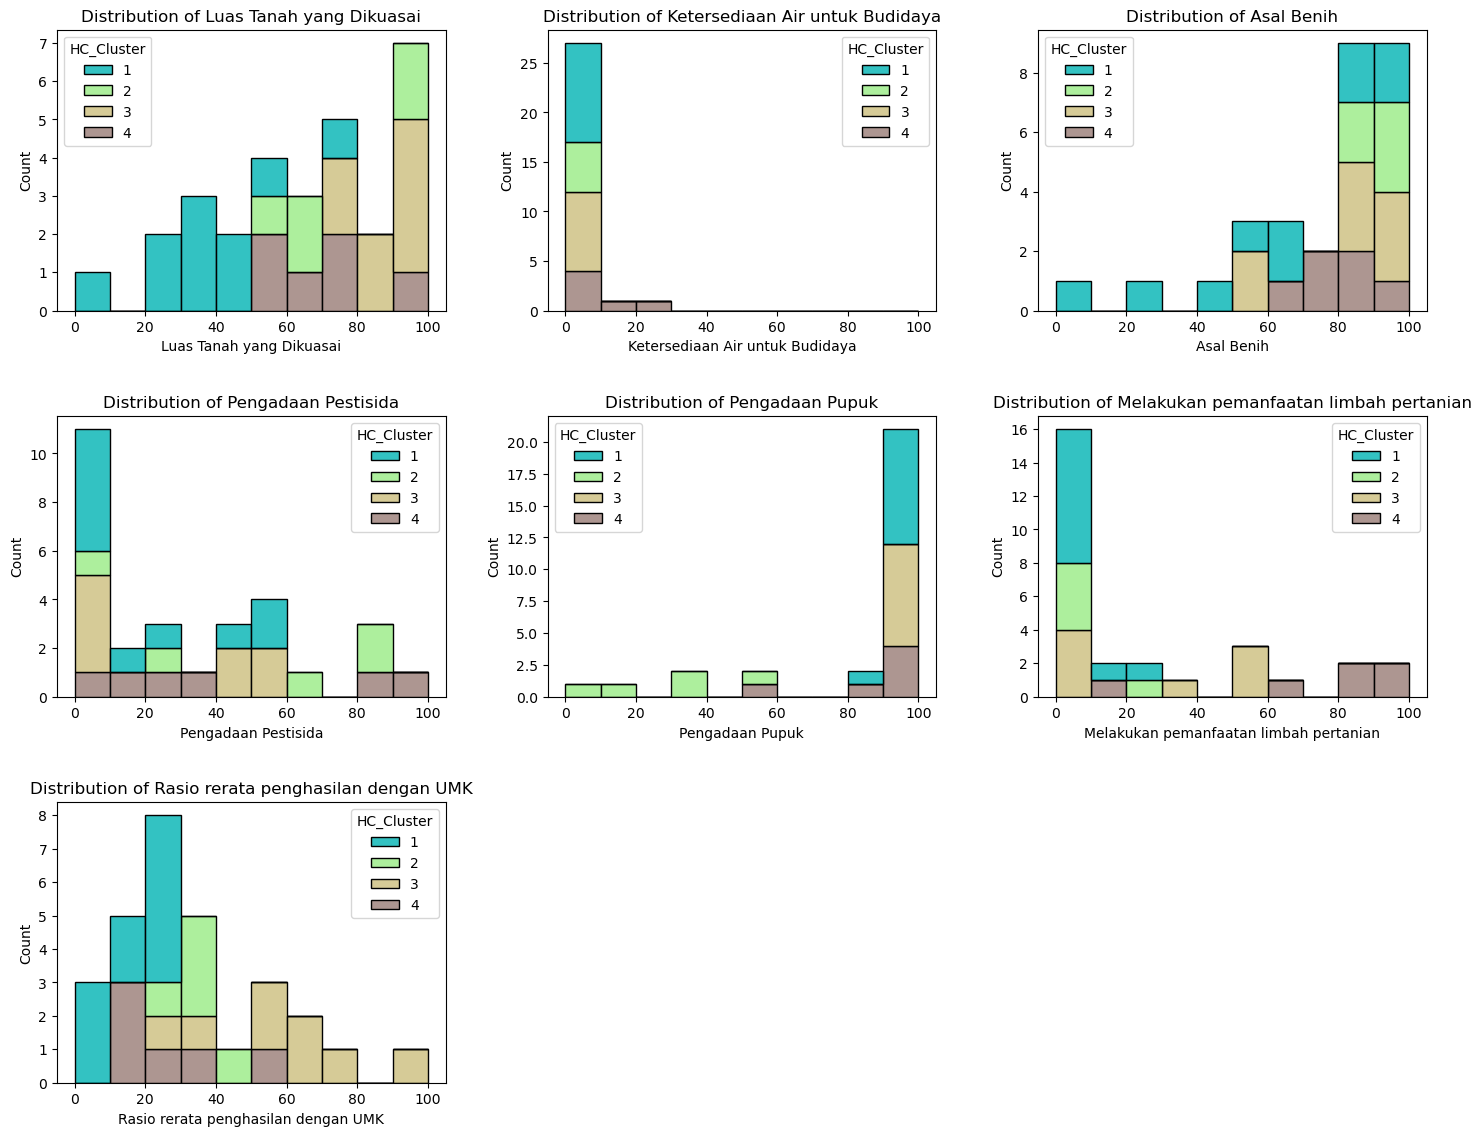

In [31]:
# 2) Palet warna terang biar konsisten
palette = {0: "#A6CEE3", 1: "#FDBF6F", 2: "#B2DF8A", 3: "#CAB2D6"}

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="terrain",
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

In [32]:
df_plot

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK,KM_Cluster,HC_Cluster
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333,0,2
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333,0,4
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529,2,4
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222,1,1
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000,0,3
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455,1,1
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429,2,2
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034,0,3
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538,2,2
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308,1,1


In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pastikan pakai data numerik dan sudah diskalakan (bisa pakai dua versi agar adil)
features = df.select_dtypes(include="number").columns
X_minmax = MinMaxScaler().fit_transform(df[features])
X_standard = StandardScaler().fit_transform(df[features])

# KMeans metrics
labels_km = df_plot["KM_Cluster"]
sil_km = silhouette_score(X_minmax, labels_km)
db_km = davies_bouldin_score(X_minmax, labels_km)
ch_km = calinski_harabasz_score(X_minmax, labels_km)

# Hierarchical metrics
labels_hc = df_plot["HC_Cluster"]
sil_hc = silhouette_score(X_standard, labels_hc)
db_hc = davies_bouldin_score(X_standard, labels_hc)
ch_hc = calinski_harabasz_score(X_standard, labels_hc)

# Tabel perbandingan
import pandas as pd
eval_df = pd.DataFrame({
    "Metric": ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz"],
    "KMeans": [sil_km, db_km, ch_km],
    "Hierarchical": [sil_hc, db_hc, ch_hc]
}).round(4)

print(eval_df)

              Metric  KMeans  Hierarchical
0         Silhouette  0.2299        0.2754
1     Davies-Bouldin  1.4557        1.2975
2  Calinski-Harabasz  8.3962        8.6243


C:\Users\halid\AppData\Local\Temp\ipykernel_15316\2307967180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  km_summary = df_plot.groupby("KM_Cluster")[features].mean().round(2)
C:\Users\halid\AppData\Local\Temp\ipykernel_15316\2307967180.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hc_summary = df_plot.groupby("HC_Cluster")[features].mean().round(2)



=== KMeans Cluster Means ===
            Luas Tanah yang Dikuasai  Ketersediaan Air untuk Budidaya  \
KM_Cluster                                                              
0                              81.16                             2.65   
1                              35.80                             0.83   
2                              68.12                             2.35   

            Asal Benih  Pengadaan Pestisida  Pengadaan Pupuk  \
KM_Cluster                                                     
0                82.42                21.12            88.32   
1                61.09                20.26            96.50   
2                87.62                80.32            39.84   

            Melakukan pemanfaatan limbah pertanian  \
KM_Cluster                                           
0                                            33.93   
1                                             4.04   
2                                            36.58   

            

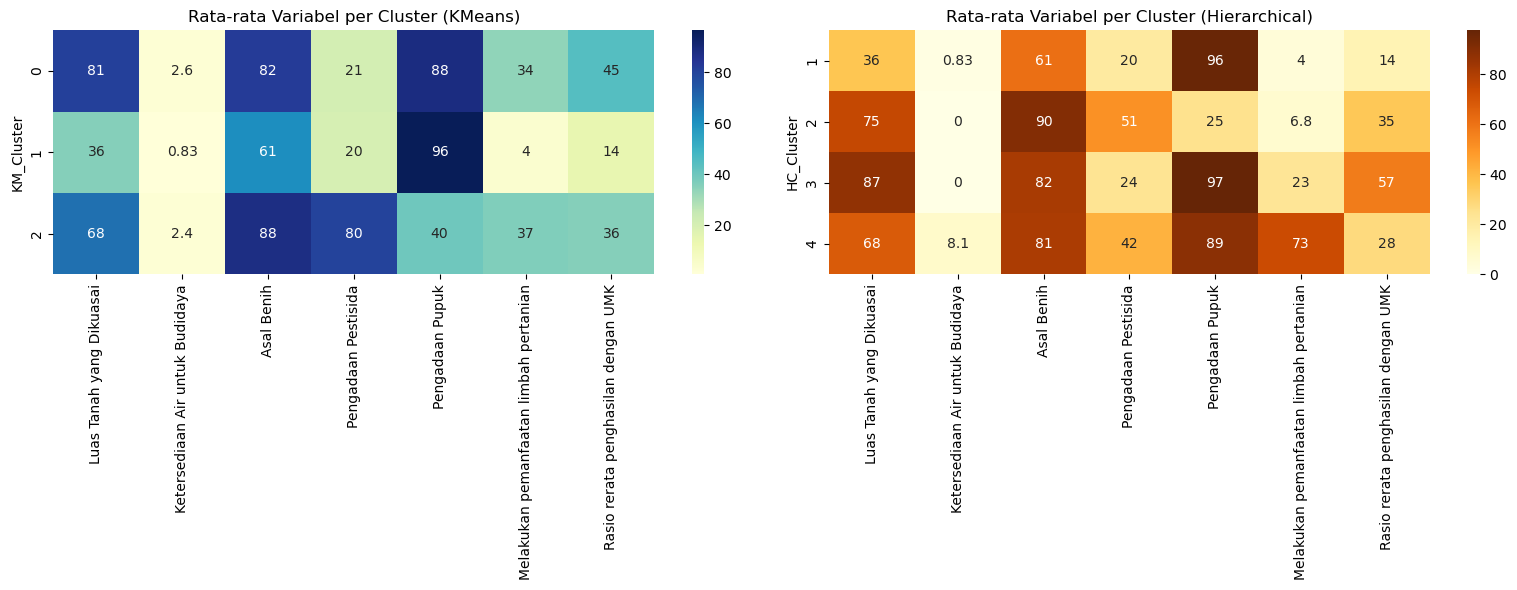

In [34]:
# Ringkasan rata-rata per cluster
km_summary = df_plot.groupby("KM_Cluster")[features].mean().round(2)
hc_summary = df_plot.groupby("HC_Cluster")[features].mean().round(2)

print("\n=== KMeans Cluster Means ===")
print(km_summary)
print("\n=== Hierarchical Cluster Means ===")
print(hc_summary)

# Visualisasi heatmap untuk perbandingan
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(km_summary, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Rata-rata Variabel per Cluster (KMeans)")

sns.heatmap(hc_summary, annot=True, cmap="YlOrBr", ax=axes[1])
axes[1].set_title("Rata-rata Variabel per Cluster (Hierarchical)")

plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import f_oneway
import pandas as pd

def anova_cluster(df, cluster_col, features):
    print(f"\n=== ANOVA untuk {cluster_col} ===")
    results = []
    for col in features:
        # ambil data tiap cluster
        groups = [df[df[cluster_col] == c][col] for c in df[cluster_col].unique()]
        stat, p = f_oneway(*groups)
        results.append((col, stat, p))
    
    # ubah jadi dataframe dan urutkan dari p-value terkecil
    res_df = (
        pd.DataFrame(results, columns=["Variabel", "F_stat", "p_value"])
        .sort_values("p_value", ascending=True)
        .reset_index(drop=True)
    )
    
    print(res_df)
    return res_df

anova_km = anova_cluster(df_plot, "KM_Cluster", features)
anova_hc = anova_cluster(df_plot, "HC_Cluster", features)



=== ANOVA untuk KM_Cluster ===
                                 Variabel     F_stat   p_value
0                Luas Tanah yang Dikuasai  23.336604  0.000002
1                     Pengadaan Pestisida  16.975573  0.000019
2                         Pengadaan Pupuk  12.542605  0.000154
3     Rasio rerata penghasilan dengan UMK   8.059364  0.001890
4                              Asal Benih   3.697651  0.038614
5  Melakukan pemanfaatan limbah pertanian   3.333314  0.051440
6         Ketersediaan Air untuk Budidaya   0.312943  0.734008

=== ANOVA untuk HC_Cluster ===
                                 Variabel     F_stat       p_value
0                         Pengadaan Pupuk  57.963897  2.129462e-11
1                Luas Tanah yang Dikuasai  17.540794  2.432562e-06
2  Melakukan pemanfaatan limbah pertanian  16.692837  3.662697e-06
3     Rasio rerata penghasilan dengan UMK  12.391546  3.685165e-05
4         Ketersediaan Air untuk Budidaya   4.321944  1.381832e-02
5                             

In [41]:
res_df[res_df["p_value"] < 0.05]


NameError: name 'res_df' is not defined